In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
g = nx.Graph()

In [ ]:
for i in range(16):
    g.add_node(chr(i+65))

In [ ]:
g.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'))

In [ ]:
g.add_edges_from([
    ("A", "D"),("A", "E"),("A", "F"),("A","H"),("A","G"),
    ("G","B"),
    ("B","I"),("B","J"), ("B","K"),("B","L"),
    ("L","C"),
    ("C","M"),("C","N"),("C","O"),("C","P")
    ])

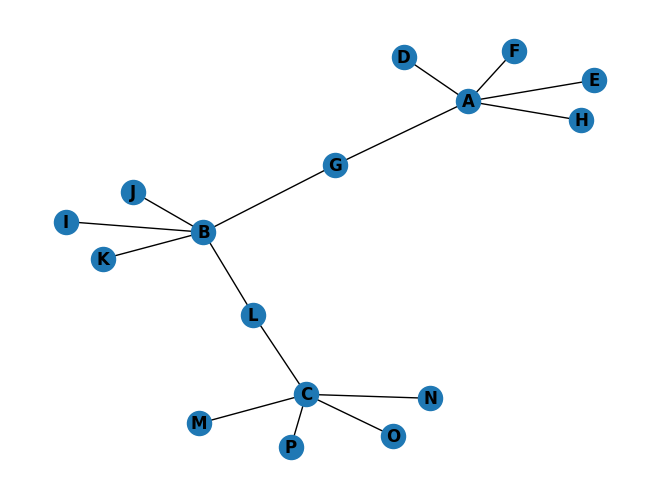

In [ ]:
nx.draw(g, with_labels=True, font_weight='bold')

In [ ]:
g1 = nx.Graph()

In [ ]:
for i in range(5):
    g1.add_node(chr(i+65))

In [ ]:
g1.add_edges_from([
    ("A","B"),("B","C"),("C","D"),("C","E"),("D","E")
])

In [ ]:
degree = dict(g1.degree())
print("Degree: ", degree)

Degree:  {'A': 1, 'B': 2, 'C': 3, 'D': 2, 'E': 2}


In [ ]:
degree_centrality = nx.degree_centrality(g1)
print("Degree Centrality: ", degree_centrality)
closeness_centrality = nx.closeness_centrality(g1)
print("Closeness Centrality: ", closeness_centrality)
betweenness_centrality = nx.betweenness_centrality(g1)
print("Betweenness Centrality: ", betweenness_centrality)

Degree Centrality:  {'A': 0.25, 'B': 0.5, 'C': 0.75, 'D': 0.5, 'E': 0.5}
Closeness Centrality:  {'A': 0.4444444444444444, 'B': 0.6666666666666666, 'C': 0.8, 'D': 0.5714285714285714, 'E': 0.5714285714285714}
Betweenness Centrality:  {'A': 0.0, 'B': 0.5, 'C': 0.6666666666666666, 'D': 0.0, 'E': 0.0}


In [ ]:
from inspect import GEN_RUNNING
def group_degree_centralization(G):
    max_deg_centrality = max(nx.degree_centrality(G)[node] for node in G.nodes())
    group_deg_centrality = nx.degree_centrality(G)
    g = G.number_of_nodes()
    sum_diff = sum(max_deg_centrality - group_deg_centrality[node] for node in G)
    return sum_diff / ((g - 1) * (g - 2))

def group_closeness_centralization(G):
    max_closeness_centrality = max(nx.closeness_centrality(G)[node] for node in G.nodes())
    group_closeness_centrality = nx.closeness_centrality(G)
    g = G.number_of_nodes()
    sum_diff = sum(max_closeness_centrality - group_closeness_centrality[node] for node in G)
    return sum_diff / ((g - 2) * (g - 1) / (2 * g - 3))

def group_betweenness_centralization(G):
    max_betweenness_centrality = max(nx.betweenness_centrality(G)[node] for node in G.nodes())
    group_betweenness_centrality = nx.betweenness_centrality(G)
    g = G.number_of_nodes()
    sum_diff = sum(max_betweenness_centrality - group_betweenness_centrality[node] for node in G)
    return sum_diff / (g - 1)

In [ ]:
g_degree_centralization = group_degree_centralization(g1)
print("Group Degree Centralization: ", g_degree_centralization)

g_closeness_centralization = group_closeness_centralization(g1)
print("Group Closeness Centralization: ", g_closeness_centralization)

g_betweenness_centralization = group_betweenness_centralization(g1)
print("Group Betweenness Centralization: ", g_betweenness_centralization)

Group Degree Centralization:  0.10416666666666667
Group Closeness Centralization:  0.551851851851852
Group Betweenness Centralization:  0.5416666666666666


In [ ]:
# nx.degree_centrality()에서 반환된 값은 normalizede된 값,
# Group degree centrality 계산 시 사용되는 term은 Standardized되지 않은 Actor degree centrality로,
# nx.degree_centrality()에서 반환된 값에 (g-1)을 곱해준 다음 사용해야함

def group_degree_centralization_modified(G):
    g = G.number_of_nodes()
    max_deg_centrality = max(nx.degree_centrality(G)[node]*(g-1) for node in G.nodes())
    group_deg_centrality = nx.degree_centrality(G)
    g = G.number_of_nodes()
    sum_diff = sum(max_deg_centrality - (group_deg_centrality[node]*(g-1)) for node in G)
    return sum_diff / ((g - 1) * (g - 2))

In [ ]:
g_degree_centralization = group_degree_centralization_modified(g1)
print("Group Degree Centralization: ", g_degree_centralization)

Group Degree Centralization:  0.4166666666666667


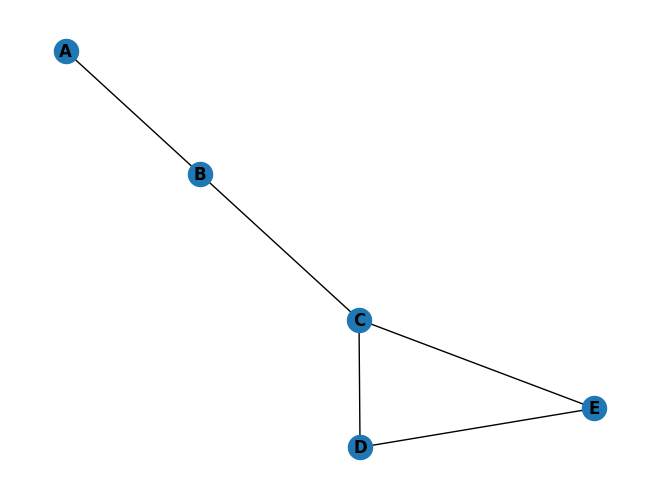

In [ ]:
nx.draw(g1, with_labels=True, font_weight='bold')